In [ ]:
/Users/halmamol/NEXT/files/NEXT100/

In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
filepath = '/Users/halmamol/NEXT/files/NEXT100/'
filename = 'next100.0nubb.367.deconv.h5'

In [5]:
#0nubb files
hits_list_0nubb = []

f0nubb_hits = filepath+filename
h5file = tb.open_file(f0nubb_hits)
h5file

File(filename=/Users/halmamol/NEXT/files/NEXT100/next100.0nubb.367.deconv.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=4, complib='zlib', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(248945,), shuffle, zlib(4)) 'Deconvolved hits'
  description := {
  "event": Int64Col(shape=(), dflt=0, pos=0),
  "npeak": UInt64Col(shape=(), dflt=0, pos=1),
  "X": Float64Col(shape=(), dflt=0.0, pos=2),
  "Y": Float64Col(shape=(), dflt=0.0, pos=3),
  "Z": Float64Col(shape=(), dflt=0.0, pos=4),
  "E": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1365,)
  autoindex := True
  colindexes := {
    "event": Index(6, medium, shuffle, zlib(1)).is_csi=False}
/Run (Group) ''
/Run/events (Table(10,), shuffle, zlib(4)) 'event info table'
  description := {
  "evt_number": Int32Col(shape=(), dflt=0, pos=0),
  "timestamp": UInt64Col(shape=(), dflt=0, pos=1)}
  byteorder := 'li

In [9]:
deco_list=[]
readfile = pd.read_hdf(f0nubb_hits, 'DECO/Events')

deco_list.append(readfile)
    
#'concat' command means: 'concatenate pandas objects along a particular 
# axis with optional set logic along the other axes.' -> following line 
# is needed to keep an order between the files

true_0nubb = pd.concat([dt for dt in deco_list]) 
true_0nubb.columns  

Index(['event', 'npeak', 'X', 'Y', 'Z', 'E'], dtype='object')

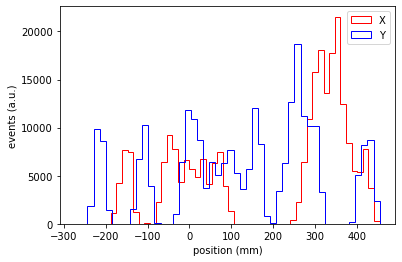

In [10]:
true_0nubb_X = true_0nubb.X
true_0nubb_Y = true_0nubb.Y

plt.hist(true_0nubb_X, bins = 50, color='red', histtype='step', label = 'X')
plt.hist(true_0nubb_Y, bins = 50, color='blue', histtype='step', label = 'Y')

plt.xlabel('position (mm)')
plt.ylabel('events (a.u.)')
plt.legend(loc=1);
plt.show()